In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-globalapprox-trig)=
# Trigonometric interpolation

Up to this point, all of our global approximating functions have been polynomials. While they are versatile and easy to work with, they are not always the best choice.

Suppose we want to approximate a function $f$ that is periodic, with one period represented by the standard interval $[-1,1]$. Mathematically, periodicity means that $f(x+2)=f(x)$ for all real $x$. We could use polynomials to interpolate or project $f$. However, it seems more reasonable to replace polynomials by functions that are also periodic.

```{index} ! trigonometric polynomial
```

::::{proof:definition} Trigonometric polynomial
For an integer $n$, a **trigonometric polynomial** of degree $n$ is 

:::{math}
:label: trigpoly-real
p(x) = \frac{a_0}{2} + \sum_{k=1}^n  a_k \cos(k\pi x) + b_k \sin(k\pi x)
:::

for real constants $a_k,b_k$. 
::::

```{index} ! interpolation; by trigonometric polynomials
```

It turns out that trigonometric interpolation allows us to return to equally spaced nodes without any problems. We therefore define $N=2n+1$ equally spaced nodes inside the interval $[-1,1]$ by

:::{math}
  :label: trignodes
  t_k = \frac{2k}{N}, \quad k=-n,\ldots,n.
:::

The formulas in this section require some minor but important adjustments if $N$ is even instead. We have modified our standard indexing scheme here to make the symmetry within $[-1,1]$ about $x=0$ more transparent. Note that the endpoints $\pm 1$ are *not* among the nodes.

As usual, we have sample values $y_{-n},\ldots,y_n$, perhaps representing values of a function $f(x)$ at the nodes.  We also now assume that the sample values can be extended periodically forever in both directions, so that $y_{k+mN}=y_k$ for any integer $m$.

## Cardinal functions

```{index} cardinal function
```
We can explicitly state the cardinal function basis for equispaced trigonometric interpolation. It starts with

:::{math}
:label: trigcardinal
\tau(x) = \frac{2}{N} \left( \frac{1}{2} + \cos \pi x + \cos 2\pi x
    + \cdots + \cos n\pi x\right) = \frac{\sin(N\pi x/2)}{N\sin(\pi x/2)}.
:::

You can directly check the following facts. (See [Exercise 3](problem-triginterp-checktau).) 

(theorem-triginterp-cardinal)=
::::{proof:theorem}
Given the definition of $\tau$ in {eq}`trigcardinal`,
1. $\tau(x)$ is a trigonometric polynomial of degree $n$.
2. $\tau(x)$ is 2-periodic.
3. $\tau(t_k)=0$ for any nonzero integer $k$.
4. $\displaystyle \lim_{x \to 0} \tau(x) = 1.$

Given also the nodes $t_k$ in {eq}`trignodes`, the functions $\tau_k(x) = \tau(x-t_k)$ form a cardinal basis for trigonometric interpolation.
::::

Because the functions $\tau_{-n},\ldots,\tau_n$ form a cardinal basis, the coefficients of the interpolant are just the sampled function values, i.e., the interpolant of points $(t_k,y_k)$ is

:::{math}
:label: trigcardinalinterp
p(x) = \sum_{k=-n}^n y_k \tau_k(x).
:::

The convergence of a trigonometric interpolant is spectral, i.e., exponential as a function of $N$ in the max-norm.
## Implementation

{numref}`Function {number} <function-triginterp>` is an implementation of trigonometric interpolation based on {eq}`trigcardinalinterp`. The function accepts an $N$-vector of equally spaced nodes. Although we have not given the formulas above, the case of even $N$ is included in the code. 

```{index} ! Julia; ternary operator, ! Julia; eachindex, ! Julia; isodd
```

(function-triginterp)=
````{proof:function} triginterp
**Trigonometric interpolation**
```{code-block} julia1
:lineno-start: 1
"""
    triginterp(t,y)

Construct the trigonometric interpolant for the points defined by 
vectors `t` and `y`.
"""
function triginterp(t,y)
    N = length(t)

    function τ(x)
        if x==0
            return 1.0
        else
            denom = isodd(N) ? N*sin(π*x/2) : N*tan(π*x/2)
            return sin(N*π*x/2)/denom
        end
    end

    return function (x)
        sum( y[k]*τ(x-t[k]) for k in eachindex(y) )
    end
end
```
````

::::{admonition} About the code
:class: dropdown
The construct on line 13 is known as a *ternary operator*. It is a shorthand for an `if`–`else` statement, giving two alternative results for the true/false cases. Line 19 uses `eachindex(y)`, which generalizes `1:length(y)` to cases where a vector might have a more exotic form of indexing.
::::

(demo-trig-interp)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
We get a cardinal function if we use data that is 1 at one node and 0 at the others.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The operator `÷`, typed as `\div` then <kbd>Tab</kbd>, returns the quotient without remainder of two integers.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

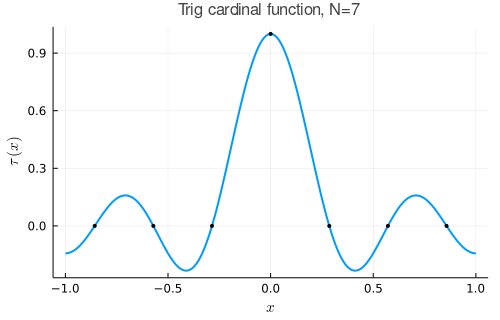

In [2]:
N = 7;  n = (N-1)÷2
t = 2*(-n:n)/N
y = zeros(N);  y[n+1] = 1;

p = FNC.triginterp(t,y);
plot(p,-1,1)

scatter!(t,y,color=:black,title="Trig cardinal function, N=$N",
    xaxis=(L"x"),yaxis=(L"\tau(x)"))

Here is a 2-periodic function and one of its interpolants.

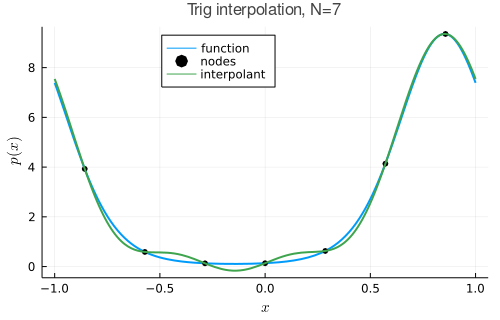

In [3]:
f = x -> exp(sin(pi*x)-2*cos(pi*x))
y = f.(t)
p = FNC.triginterp(t,y)

plot(f,-1,1,label="function",
    xaxis=(L"x"),yaxis=(L"p(x)"),
    title="Trig interpolation, N=$N",legend=:top)  
scatter!(t,y,m=:o,color=:black,label="nodes")
plot!(p,-1,1,label="interpolant")

```{index} ! Julia; ÷
```

The convergence of the interpolant is spectral. We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes. Note that when $N$ is even, the value of $n$ is not an integer but works fine for defining the nodes.

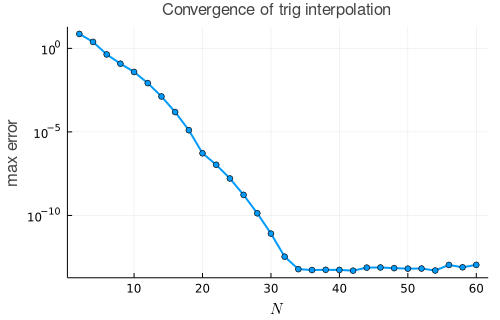

In [4]:
N = 2:2:60
err = zeros(size(N))

x = range(-1,1,length=2501)  # for measuring error
for (k,N) in enumerate(N)
    n = (N-1)/2;   t = 2*(-n:n)/N;
    p = FNC.triginterp(t,f.(t))
    err[k] = norm(f.(x)-p.(x),Inf)
end

plot(N,err,m=:o,title="Convergence of trig interpolation",
    xaxis=(L"N"),yaxis=(:log10,"max error"))

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Fast Fourier transform

Although the cardinal form of the interpolant is useful and stable, there is a fundamental alternative. It begins with an equivalent complex form of the trigonometric interpolant {eq}`trigpoly-real`, 

:::{math}
  :label: trigpoly-complex
  p(x) = \sum_{k=-n}^n c_k e^{ik\pi x}.
:::

The connection is made through Euler's formula,

:::{math}
  :label: eulerformula
  e^{i\theta} = \cos(\theta) + i\sin(\theta),
:::

and the resultant identities

:::{math}
  :label: eulersincos
  \cos \theta = \frac{e^{i \theta}+e^{-i\theta}}{2}, \qquad \sin \theta = \frac{e^{i \theta}-e^{-i\theta}}{2i}.
:::

Specifically, we have

:::{math}
c_k = \begin{cases} \frac{a_0}{2}, & k=0, \\[1mm] 
\frac{1}{2}(a_k + i b_k), & k> 0, \\[1mm]
\overline{c_{-k}}, & k < 0. 
\end{cases}
::: 

While working with an all-real formulation seems natural when the data are real, the complex-valued version leads to more elegant formulas and is standard. 

The $N=2n+1$ coefficients $c_k$ are determined by interpolation nodes at the $N$ nodes within $[-1,1]$. By evaluating the complex exponential functions at these nodes, we get the $N\times N$ linear system

$$
    \mathbf{F}\mathbf{c} = \mathbf{y}, \qquad \mathbf{F} = \bigl[  e^{\,is\pi t_r}  \bigr]_{\, r=-n,\ldots,n,\, s=-n,\ldots,n,}
$$

to be solved for the coefficients. Up to a scalar factor, the matrix $\mathbf{F}$ is unitary, which implies that the system can be solved in $O(N^2)$ operations simply by a matrix-vector multiplication.

```{index} ! FFT (fast Fourier transform)
```

However, one of the most important (though not entirely original) algorithmic observations of the 20th century was that the linear system can be solved in just $O(N\log N)$ operations by an algorithm now known as the **fast Fourier transform**, or **FFT**.

```{index} ! Julia; fft
```

The `FFTW` package provides a function `fft` to perform this transform, but its conventions are a little different from ours. Instead of nodes in $(-1,1)$, it expects the nodes to be defined in $[0,2)$, and it returns the trig polynomial coefficients in the order

$$
\begin{bmatrix}
  c_0, & c_1, & \cdots & c_n, & c_{-n}, & \cdots & c_{-1}
\end{bmatrix}.
$$

(demo-trig-fft)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```


This function has frequency content at $2\pi$, $-2\pi$, and $\pi$.

In [5]:
f = x -> 3*cos(2π*x) - exp(1im*π*x);

To use `fft`, we set up nodes in the interval $[0,2)$.

In [6]:
n = 4;  N = 2n+1;
t = [ 2j/N for j=0:N-1 ]      # nodes in [0,2)
y = f.(t);

We perform Fourier analysis using `fft` and then examine the resulting coefficients.

In [7]:
c = fft(y)/N
freq = [0:n;-n:-1]
data = round.(c,sigdigits=5)
pretty_table((k=freq,coefficient=data),nosubheader=true)

┌────┬─────────────────────────┐
│  k │             coefficient │
├────┼─────────────────────────┤
│  0 │       -7.4015e-17+0.0im │
│  1 │       -1.0+3.1961e-16im │
│  2 │         1.5-6.866e-16im │
│  3 │ 2.0068e-16-3.7007e-17im │
│  4 │ 2.2204e-16+2.3261e-16im │
│ -4 │  1.727e-16-3.0001e-16im │
│ -3 │ 2.4341e-16-3.7007e-17im │
│ -2 │        1.5+7.1744e-16im │
│ -1 │        0.0-1.9625e-16im │
└────┴─────────────────────────┘


Note that $1.5 e^{2i\pi x}+1.5 e^{-2i\pi x} = 3 \cos(2\pi x)$, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that *every* periodic function is just a combination of frequencies—infinitely many of them in general, but truncated for computational use. Here we look at the magnitudes of the coefficients for $f(x) = \exp( \sin(\pi x) )$.

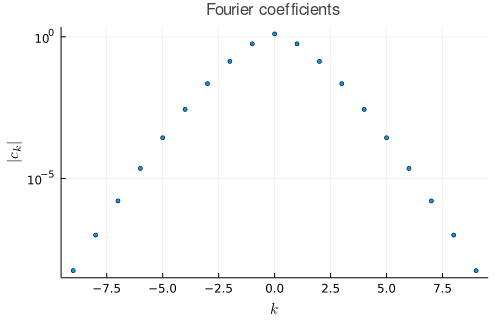

In [8]:
f = x -> exp( sin(pi*x) )     # content at all frequencies
n = 9;  N = 2n+1;
t = [ 2j/N for j=0:N-1 ]      # nodes in [0,2)
c = fft(f.(t))/N

freq = [0:n;-n:-1]
scatter(freq,abs.(c),xaxis=(L"k",[-n,n]),yaxis=(L"|c_k|",:log10), 
    title="Fourier coefficients",leg=:none)

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is determines the convergence of the interpolation error.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The theoretical and computational aspects of Fourier analysis are vast and far-reaching. We have given only the briefest of introductions.

## Exercises

1. ⌨  Each of the following functions is 2-periodic. Use {numref}`Function {number} <function-triginterp>` to plot the function together with its trig interpolants with $n=3,6,9$. Then, for $n=2,3,\ldots,30$, compute the max-norm error in the trig interpolant by sampling at $1000$ or more points, and make a convergence plot on a semi-log scale.

    **(a)** $f(x) = e^{\sin (2\pi x)}\qquad$
    **(b)** $f(x) = \log [2+ \sin (3 \pi x ) ]\qquad$
    **(c)** $f(x) = \cos^{12}[\pi (x-0.2)]$

    ```{index} ! aliasing
    ```
2. **(a)** ✍ Show that the functions $\sin(r\pi x)$ and $\sin(s\pi x)$ are identical at all of the nodes given in {eq}`trignodes` if $r-s=mN$ for an integer $m$. This important fact is called *aliasing*, and it implies that only finitely many frequencies can be distinguished on a fixed node set.

    **(b)** ⌨  Demonstrate part (a) with a graph for the case $N=11$, $s=2$, $r=-9$. Specifically, plot the two functions on one graph, and plot points to show that they intersect at all of the interpolation nodes.

    (problem-triginterp-checktau)=
3. ✍ Verify that the cardinal function given in Equation {eq}`trigcardinal` is (a) 2-periodic, (b) satisfies $\tau(t_k)=0$ for $k\neq 0$ at the nodes {eq}`trignodes`, and (c) satisfies $\lim_{x\to0}\tau(x)=1$.

4. ✍ Prove the equality of the two expressions in {eq}`trigcardinal`. (Hint: Set $z=e^{i\pi x/2}$ and rewrite the sum using $z$ by applying Euler's identity.)


    ```{index} Gibbs phenomenon
    ```
5. ⌨ Spectral convergence is predicated on having infinitely many continuous derivatives. At the other extreme is a function with a jump discontinuity. Trigonometric interpolation across a jump leads to a lack of convergence altogether, a fact famously known as the *Gibbs phenomenon*.
  
    **(a)** Define `f(x) = sign(x+eps())`. This function jumps from $-1$ to $1$ at $x=-\epsilon_\text{mach}$. Plot the function over $-0.05\le x \le 0.15$.

    **(b)** Let $n=30$ and $N=2n+1$. Using {numref}`Function {number} <function-triginterp>`, add a plot of the trigonometric interpolant to $f$ to the graph from part (a).

    **(c)** Repeat part (b) for $n=80$ and $n=180$.

    **(d)** You should see that the interpolants overshoot and oscillate near the step. The widths of the overshoots decrease with $n$ but the heights approach a limiting value. By zooming in to the graph, find the height of the overshoot to two decimal places.

6. ⌨ Let $f(x)=x$. Plot $f$ and its trigonometric interpolants of length $N=2n+1$ for $n=6,20,50$ over $-1\le x \le 1$. What feature of the function is causing large errors?